# Data Science Project - NYC GeoData
## Midterm report

## Team Members:
### Dhruv Anand (danand), Abhik Mondal (abhikm)

The objective of this project is to try and glean interesting observations from a geographical datasets relating to NYC. Information from different datasets will be combined to answer interesting connections about the behavior of people in New York.

In [24]:
import geopandas as gpd
import pandas as pd
import shapely
from shapely.geometry import Polygon,Point
from geopy.geocoders import GoogleV3
import rtree
import numpy as np
import re
import seaborn as sns
matplotlib.use("svg")
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

/Users/dhruv/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
boros = gpd.GeoDataFrame.from_file('nybb_16d/nybb.shp').to_crs({'init': 'epsg:4326'})
zips = gpd.GeoDataFrame.from_file('ZIP_CODE_040114/ZIP_CODE_040114.shp').to_crs({'init': 'epsg:4326'})
non_decimal = re.compile(r'[^\s\d.-]+')
subways = pd.read_csv('DOITT_SUBWAY_ENTRANCE_01_13SEPT2010.csv')
subways['geometry'] = subways['the_geom'].apply(lambda z: Point(map(float,non_decimal.sub('', z).strip().split(' '))))
subways = gpd.GeoDataFrame(subways)
uber = pd.read_csv('uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-apr14.csv')
uber['geometry'] = [Point(xy) for xy in zip(uber.Lon, uber.Lat)]
uber = gpd.GeoDataFrame(uber)
fhv = pd.read_csv('../fhv_tripdata_2016-01.csv')

In [3]:
# print fhv.head()
print uber.head()
# len(sorted(fhv['Dispatching_base_num'].value_counts(dropna=False).keys()))


          Date/Time      Lat      Lon    Base  \
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512   
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512   
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512   
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512   
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512   

                             geometry  
0   POINT (-73.95489999999999 40.769)  
1  POINT (-74.03449999999999 40.7267)  
2            POINT (-73.9873 40.7316)  
3            POINT (-73.9776 40.7588)  
4            POINT (-73.9722 40.7594)  


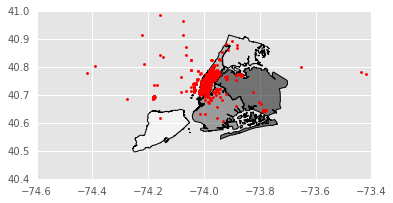

In [35]:
# plt.figure(15,1)
base = boros.plot()
# zips.plot(ax=base);
# circles= subways.buffer(0.005)
# mp = circles.unary_union
# boros['geometry'].intersection(mp)
# circles.plot(ax=base)
# uber[:100].loc[boros.contains(uber[:100])].plot()

# uber[:100][uber[:100].within(boros)]
uber[:1000].plot(ax=base, color='red',markersize=2.9)
# subways.plot(ax=base, color='red',markersize=0.1);

In [7]:
len(uber)

564516

In [1]:
# import scic_dist_functions as scic_dist;
import scic_stat_tests as sc2;

3!= 6.0 = e^(ln[gamma(4)]) = 6
120.0
4.03291461127e+26
24.0
0.994376487882
0.00562351211827
1.0
0.112754082424
0.520357177501
0.842681743299
0.999999999998
-0.112754082424
-0.520357177501
-0.842681743299
-0.999999999998
3!= 6.0 = e^(ln[gamma(4)]) = 6
120.0
4.03291461127e+26
24.0
0.994376487882
0.00562351211827
1.0
0.112754082424
0.520357177501
0.842681743299
0.999999999998
-0.112754082424
-0.520357177501
-0.842681743299
-0.999999999998
36.4981663726
0.999329074744


In [3]:
sc2.ks2d2s([1,2],[2,3],[1,2],[2,3])

ZeroDivisionError: float division by zero

In [17]:
import ndtest

In [18]:
ndtest.ks2d2s([1,2],[2,3],[1,2],[2,3])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()